In [1]:
import numpy as np
import pandas as pd
from math import ceil
import os
import random
import matplotlib.pylab as plt
import plotly.express as px
from zipfile import ZipFile
from PIL import Image, ImageEnhance; Image.MAX_IMAGE_PIXELS = 5_000_000_000

from sklearn.decomposition import PCA


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import plotly 
import plotly.graph_objs as go
import chart_studio.plotly as py
#import plotly.plotly as py
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense,MaxPooling2D, MaxPool2D, Conv2D,Flatten,Dropout, Activation, BatchNormalization, GlobalAveragePooling2D
#from tensorflow.keras.preprocessing import image


#from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

#from kaggle_datasets import KaggleDatasets

In [23]:
import os
import sys
import warnings
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, LogisticRegression
from fast_ml.model_development import train_valid_test_split
#import mlflow
#import mlflow.sklearn
import logging
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv(r"C:\Users\Genet Shanko\Desktop\creative_image_optimization\cleaned_df.csv")

In [4]:
df.head()

ER       CTR                                           all_text  \
0  0.209269  0.058438  PHILADELPHIA AREA 1EXUS DEALERS Ovexus L/CERTI...   
1  0.274552  0.074731  Ovexus L/CERTIFIED BY LEXUS PHILADELPHIA AREA ...   
2  0.103688  0.042228  PHILADELPHIA AREA 1 EXUS DEALERS Ovexus L/CERT...   
3  0.136963  0.005393  (= POR OOK aU     2025 PACKAGING COMMITMENT FE...   
4  0.114208  0.016443  N THEATERS FUERYWHERPRIL 2024 Te SUS THE NEW A...   

        LAR  all_objects_count  unique_objects_count    cta_text  cta_width  \
0  0.000000                  9                     2  LEARN MORE       64.0   
1  0.000000                 13                     2  LEARN MORE       64.0   
2  0.000000                 11                     2  LEARN MORE       50.0   
3  0.078828                  6                     4         NaN       79.0   
4  0.123817                  8                     1          Te       60.0   

   cta_height    red  green   blue  logo_width  logo_height  eng_width  \
0       300.0   23.0   37.0   25.0           0            0        466   
1       300.0   23.0   37.0   25.0           0            0        466   
2       234.0   23.0   37.0   25.0           0            0        380   
3       227.0  149.0   78.0   65.0         244          174          0   
4       206.0  128.0  191.0  254.0         323          115          0   

   eng_height  preview_width  preview_height  
0          77              0               0  
1          77              0               0  
2          63              0               0  
3           0            859             627  
4           0            500             600

In [5]:
df.tail()

ER       CTR                                           all_text  \
900  0.365997  0.008790            ss Se de BUY NOW TO SHAKE UP THE BORING   
901  0.103055  0.043215  LEARN MORE Ovexus L/CERTIFIED BY LEXUS THOMPSO...   
902  0.191425  0.038692  HUW DID Mi }a.) 3 UL Oe ere) BOLDEST STORIES? ...   
903  0.073058  0.000057  * EPAestimated 247 miles of electric range. Ac...   
904  0.085290  0.000000  Kh6éng ding y Rat déng y Déng y Rat khéng déng...   

     LAR  all_objects_count  unique_objects_count             cta_text  \
900  0.0                  4                     4              BUY NOW   
901  0.0                 12                     3           LEARN MORE   
902  0.0                  3                     2  Po o LEARN MORE 7 y   
903  0.0                 12                     5                  NaN   
904  0.0                  0                     0                  NaN   

     cta_width  cta_height    red  green   blue  logo_width  logo_height  \
900      111.0       403.0  178.0  165.0   58.0           0            0   
901       50.0       234.0   23.0   37.0   25.0           0            0   
902       53.0       173.0  131.0  159.0  135.0           0            0   
903        NaN         NaN    NaN    NaN    NaN           0            0   
904        NaN         NaN    NaN    NaN    NaN           0            0   

     eng_width  eng_height  preview_width  preview_height  
900        351         111              0               0  
901        380          63              0               0  
902        228          28              0               0  
903          0           0              0               0  
904          0           0              0               0

In [7]:
df.CTR.describe() 

count    905.000000
mean       0.034466
std        0.036967
min        0.000000
25%        0.007926
50%        0.024537
75%        0.047796
max        0.297410
Name: CTR, dtype: float64

In [8]:
df.isnull()

ER    CTR  all_text    LAR  all_objects_count  unique_objects_count  \
0    False  False     False  False              False                 False   
1    False  False     False  False              False                 False   
2    False  False     False  False              False                 False   
3    False  False     False  False              False                 False   
4    False  False     False  False              False                 False   
..     ...    ...       ...    ...                ...                   ...   
900  False  False     False  False              False                 False   
901  False  False     False  False              False                 False   
902  False  False     False  False              False                 False   
903  False  False     False  False              False                 False   
904  False  False     False  False              False                 False   

     cta_text  cta_width  cta_height    red  green   blue  logo_width  \
0       False      False       False  False  False  False       False   
1       False      False       False  False  False  False       False   
2       False      False       False  False  False  False       False   
3        True      False       False  False  False  False       False   
4       False      False       False  False  False  False       False   
..        ...        ...         ...    ...    ...    ...         ...   
900     False      False       False  False  False  False       False   
901     False      False       False  False  False  False       False   
902     False      False       False  False  False  False       False   
903      True       True        True   True   True   True       False   
904      True       True        True   True   True   True       False   

     logo_height  eng_width  eng_height  preview_width  preview_height  
0          False      False       False          False           False  
1          False      False       False          False           False  
2          False      False       False          False           False  
3          False      False       False          False           False  
4          False      False       False          False           False  
..           ...        ...         ...            ...             ...  
900        False      False       False          False           False  
901        False      False       False          False           False  
902        False      False       False          False           False  
903        False      False       False          False           False  
904        False      False       False          False           False  

[905 rows x 18 columns]

In [21]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         ER    CTR  all_text    LAR  all_objects_count  unique_objects_count  \
0    False  False     False  False              False                 False   
1    False  False     False  False              False                 False   
2    False  False     False  False              False                 False   
3    False  False     False  False              False                 False   
4    False  False     False  False              False                 False   
..     ...    ...       ...    ...                ...                   ...   
900  False  False     False  False              False                 False   
901  False  False     False  False              False                 False   
902  False  False     False  False              False                 False   
903  False  False     False  False              False                 False   
904  False  False     False  False              False                

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ER                    905 non-null    float64
 1   CTR                   905 non-null    float64
 2   all_text              899 non-null    object 
 3   LAR                   905 non-null    float64
 4   all_objects_count     905 non-null    int64  
 5   unique_objects_count  905 non-null    int64  
 6   cta_text              727 non-null    object 
 7   cta_width             789 non-null    float64
 8   cta_height            789 non-null    float64
 9   red                   789 non-null    float64
 10  green                 789 non-null    float64
 11  blue                  789 non-null    float64
 12  logo_width            905 non-null    int64  
 13  logo_height           905 non-null    int64  
 14  eng_width             905 non-null    int64  
 15  eng_height            9

###### Engagement Rate (ER) - the number of engagements divided by the number of impressions,    Click Through Rate (CTR) - the number of clicks divided by the number of engagements

{'Mean': 0.13631813459979578,
 'Median': 0.1186235825246169,
 'Standard Dev': 0.09147339575984849}

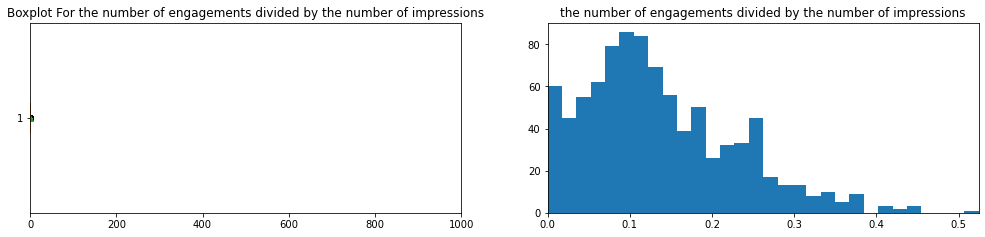

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df.ER, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df.ER+1000))
axes[0].set_title('Boxplot For the number of engagements divided by the number of impressions')
axes[1].hist(df.ER, cumulative=False, bins=30)
axes[1].set_title("the number of engagements divided by the number of impressions")
axes[1].set_xlim((min(df.ER), max(df.ER)))
{"Mean":np.nanmean(df.ER),"Median":np.nanmedian(df.ER),"Standard Dev":np.nanstd(df.ER)}

{'Mean': 0.03446550402964832,
 'Median': 0.0245367505187666,
 'Standard Dev': 0.036946925452040355}

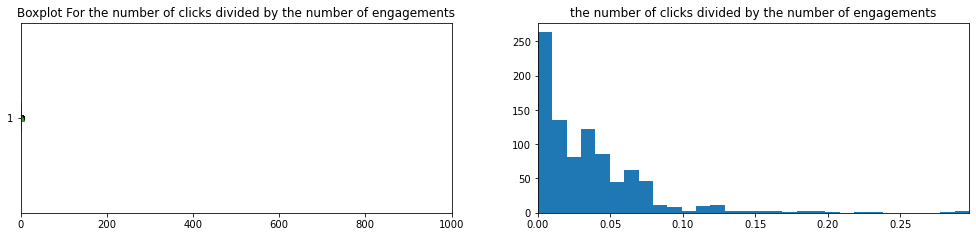

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df.CTR, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df.CTR+1000))
axes[0].set_title('Boxplot For the number of clicks divided by the number of engagements')
axes[1].hist(df.CTR, cumulative=False, bins=30)
axes[1].set_title("the number of clicks divided by the number of engagements")
axes[1].set_xlim((min(df.CTR), max(df.CTR)))
{"Mean":np.nanmean(df.CTR),"Median":np.nanmedian(df.CTR),"Standard Dev":np.nanstd(df.CTR)}

{'Mean': 0.03446550402964832,
 'Median': 0.0245367505187666,
 'Standard Dev': 0.036946925452040355}

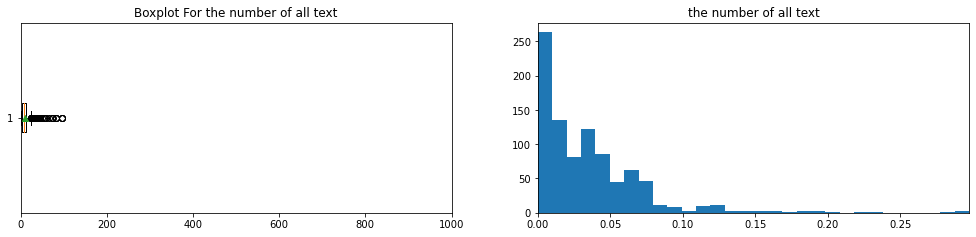

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df.all_objects_count , showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df.CTR+1000))
axes[0].set_title('Boxplot For the number of all object count')
axes[1].hist(df.CTR, cumulative=False, bins=30)
axes[1].set_title("the number of all text")
axes[1].set_xlim((min(df.CTR), max(df.CTR)))
{"Mean":np.nanmean(df.CTR),"Median":np.nanmedian(df.CTR),"Standard Dev":np.nanstd(df.CTR)}

{'Mean': 0.03446550402964832,
 'Median': 0.0245367505187666,
 'Standard Dev': 0.036946925452040355}

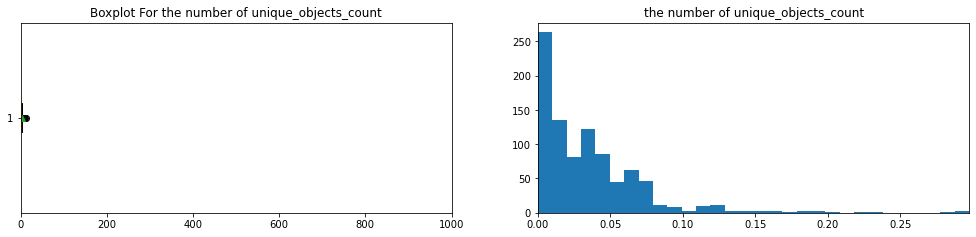

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df.unique_objects_count , showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df.CTR+1000))
axes[0].set_title('Boxplot For the number of unique_objects_count')
axes[1].hist(df.CTR, cumulative=False, bins=30)
axes[1].set_title("the number of unique_objects_count")
axes[1].set_xlim((min(df.CTR), max(df.CTR)))
{"Mean":np.nanmean(df.CTR),"Median":np.nanmedian(df.CTR),"Standard Dev":np.nanstd(df.CTR)}

In [17]:
df.isnull().sum().sum



<bound method NDFrame._add_numeric_operations.<locals>.sum of ER                        0
CTR                       0
all_text                  6
LAR                       0
all_objects_count         0
unique_objects_count      0
cta_text                178
cta_width               116
cta_height              116
red                     116
green                   116
blue                    116
logo_width                0
logo_height               0
eng_width                 0
eng_height                0
preview_width             0
preview_height            0
dtype: int64>

array([[<AxesSubplot:title={'center':'ER'}>,
        <AxesSubplot:title={'center':'CTR'}>,
        <AxesSubplot:title={'center':'LAR'}>,
        <AxesSubplot:title={'center':'all_objects_count'}>],
       [<AxesSubplot:title={'center':'unique_objects_count'}>,
        <AxesSubplot:title={'center':'cta_width'}>,
        <AxesSubplot:title={'center':'cta_height'}>,
        <AxesSubplot:title={'center':'red'}>],
       [<AxesSubplot:title={'center':'green'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'logo_width'}>,
        <AxesSubplot:title={'center':'logo_height'}>],
       [<AxesSubplot:title={'center':'eng_width'}>,
        <AxesSubplot:title={'center':'eng_height'}>,
        <AxesSubplot:title={'center':'preview_width'}>,
        <AxesSubplot:title={'center':'preview_height'}>]], dtype=object)

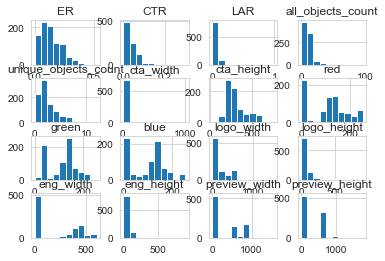

In [24]:
df.hist()

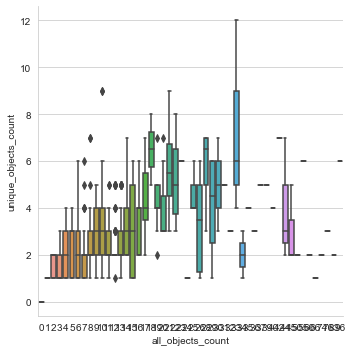

In [25]:
sns.catplot(x="all_objects_count", y="unique_objects_count", kind="box", data=df.query("CTR!=0"))

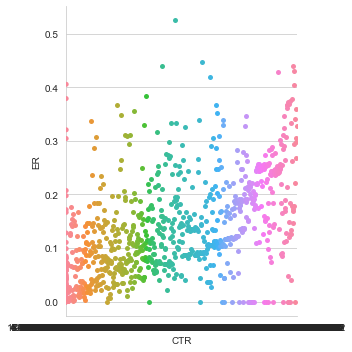

In [26]:
sns.catplot(x="CTR", y="ER", data=df)

In [35]:
pip install "cython>=0.29"

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: cython>=0.29 in c:\users\genet shanko\anaconda3\lib\site-packages (0.29.28)



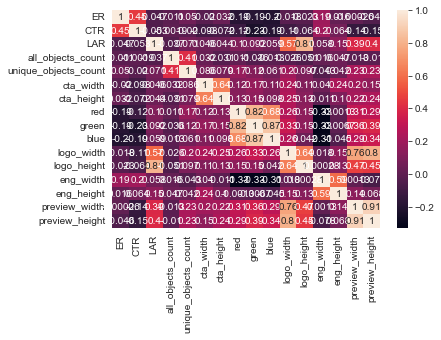

In [27]:
ax = sns.heatmap(df.corr(), annot=True)

C:\Users\Genet Shanko\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ER', ylabel='Density'>

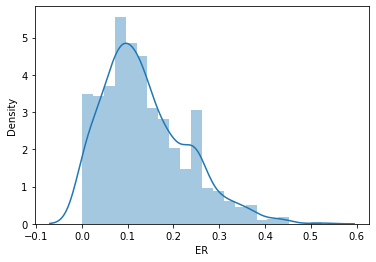

In [63]:
sns.distplot(df['ER'])

C:\Users\Genet Shanko\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CTR', ylabel='Density'>

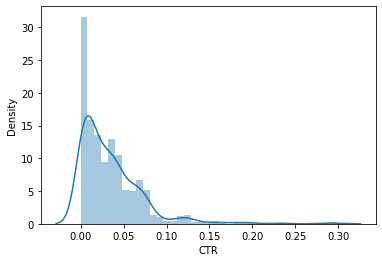

In [64]:
sns.distplot(df['CTR'])

<AxesSubplot:xlabel='all_objects_count', ylabel='Density'>

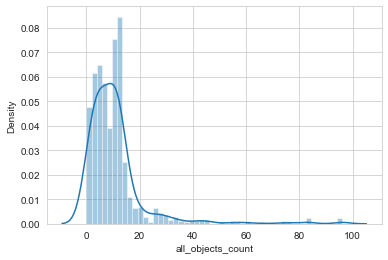

In [28]:
# The distribution of all_objects_count
sns.distplot(df['all_objects_count'])

<AxesSubplot:xlabel='unique_objects_count', ylabel='Density'>

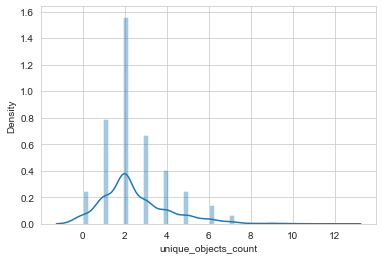

In [29]:
# The distribution of unique_objects_count
sns.distplot(df['unique_objects_count'])

<AxesSubplot:xlabel='red', ylabel='Density'>

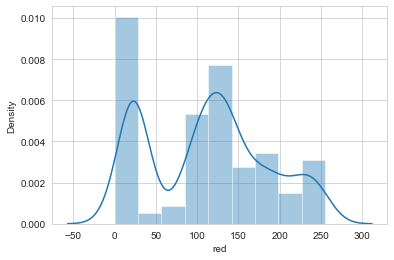

In [30]:
# The distribution of red
sns.distplot(df['red'])

<AxesSubplot:xlabel='red', ylabel='Density'>

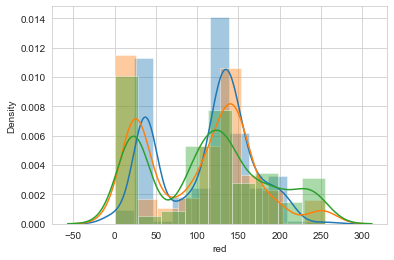

In [32]:
# The distribution of green
sns.distplot(df['green'])
# The distribution of blue
sns.distplot(df['blue'])
# The distribution of red
sns.distplot(df['red'])


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ER                    905 non-null    float64
 1   CTR                   905 non-null    float64
 2   all_text              899 non-null    object 
 3   LAR                   905 non-null    float64
 4   all_objects_count     905 non-null    int64  
 5   unique_objects_count  905 non-null    int64  
 6   cta_text              727 non-null    object 
 7   cta_width             789 non-null    float64
 8   cta_height            789 non-null    float64
 9   red                   789 non-null    float64
 10  green                 789 non-null    float64
 11  blue                  789 non-null    float64
 12  logo_width            905 non-null    int64  
 13  logo_height           905 non-null    int64  
 14  eng_width             905 non-null    int64  
 15  eng_height            9

<AxesSubplot:xlabel='cta_height', ylabel='Density'>

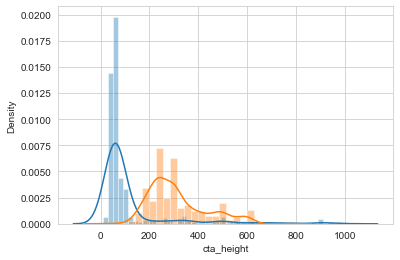

In [35]:
# The distribution of CTA text and width
#sns.distplot(df['cta_text'])
sns.distplot(df['cta_width'])
# The distribution of CTA  hight
sns.distplot(df['cta_height'])


<AxesSubplot:xlabel='logo_height', ylabel='Density'>

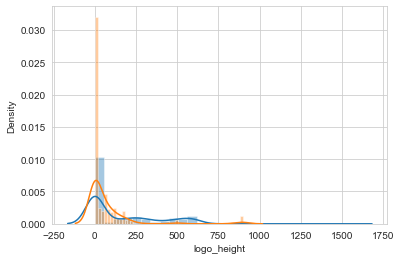

In [38]:
# The distribution of logo_width
sns.distplot(df['logo_width'])
# The distribution of logo_height
sns.distplot(df['logo_height'])


<AxesSubplot:xlabel='eng_height', ylabel='Density'>

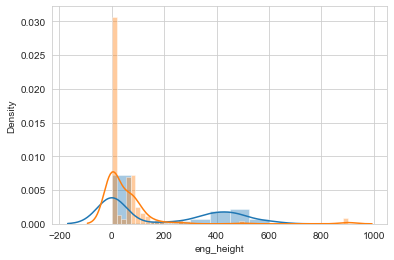

In [39]:
# The distribution of eng_width
sns.distplot(df['eng_width'])
# The distribution of eng_height
sns.distplot(df['eng_height'])


<AxesSubplot:xlabel='green', ylabel='red'>

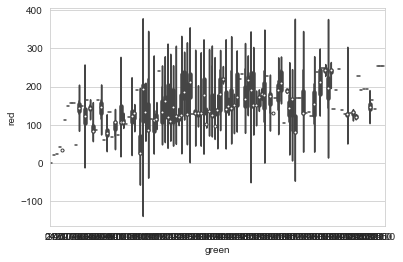

In [46]:
# There is no control entry for platform os of 7, So it  requires randomization
sns.violinplot(x=df['green'],y=df['red'])

<AxesSubplot:xlabel='red', ylabel='blue'>

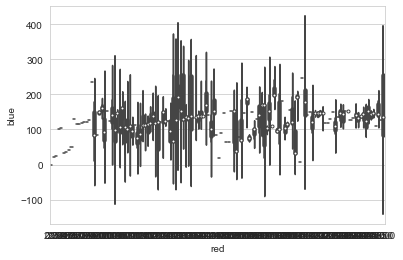

In [47]:
# There is no control entry for platform os of 7, So it  requires randomization
sns.violinplot(x=df['red'],y=df['blue'])

<AxesSubplot:xlabel='preview_height', ylabel='Density'>

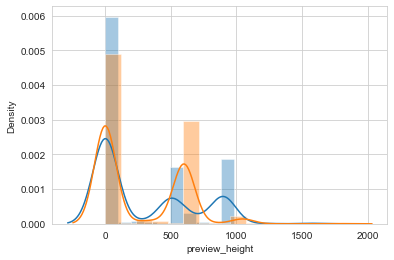

In [41]:
# The distribution of preview_width
sns.distplot(df['preview_width'])
# The distribution of  preview_height
sns.distplot(df['preview_height'])

In [48]:
print("train:\n\n", df.isnull().sum(),  
     "\n\nstore:\n\n", df.isnull().sum())

train:

 ER                        0
CTR                       0
all_text                  6
LAR                       0
all_objects_count         0
unique_objects_count      0
cta_text                178
cta_width               116
cta_height              116
red                     116
green                   116
blue                    116
logo_width                0
logo_height               0
eng_width                 0
eng_height                0
preview_width             0
preview_height            0
dtype: int64 

store:

 ER                        0
CTR                       0
all_text                  6
LAR                       0
all_objects_count         0
unique_objects_count      0
cta_text                178
cta_width               116
cta_height              116
red                     116
green                   116
blue                    116
logo_width                0
logo_height               0
eng_width                 0
eng_height                0
preview_width  

# Remove features with high percentages of missing values

In [61]:
# replace missing values in red,green,blue cta_text, cta_width,cta_height with median for the store dataset
df.red.fillna(df.red.median(), inplace=True)
df.green.fillna(df.green.median(), inplace=True)
df.blue.fillna(df.blue.median(), inplace=True)
#df.cta_text.fillna(df.cta_text.median(), inplace=True)
df.cta_width.fillna(df.cta_width.median(), inplace=True)
df.cta_height.fillna(df.cta_height.median(), inplace=True)
#df.all_text.fillna(df.all_text.median(), inplace=True)
 

In [62]:
df.head()

ER       CTR                                           all_text  \
0  0.209269  0.058438  PHILADELPHIA AREA 1EXUS DEALERS Ovexus L/CERTI...   
1  0.274552  0.074731  Ovexus L/CERTIFIED BY LEXUS PHILADELPHIA AREA ...   
2  0.103688  0.042228  PHILADELPHIA AREA 1 EXUS DEALERS Ovexus L/CERT...   
3  0.136963  0.005393  (= POR OOK aU     2025 PACKAGING COMMITMENT FE...   
4  0.114208  0.016443  N THEATERS FUERYWHERPRIL 2024 Te SUS THE NEW A...   

        LAR  all_objects_count  unique_objects_count    cta_text  cta_width  \
0  0.000000                  9                     2  LEARN MORE       64.0   
1  0.000000                 13                     2  LEARN MORE       64.0   
2  0.000000                 11                     2  LEARN MORE       50.0   
3  0.078828                  6                     4         NaN       79.0   
4  0.123817                  8                     1          Te       60.0   

   cta_height    red  green   blue  logo_width  logo_height  eng_width  \
0       300.0   23.0   37.0   25.0           0            0        466   
1       300.0   23.0   37.0   25.0           0            0        466   
2       234.0   23.0   37.0   25.0           0            0        380   
3       227.0  149.0   78.0   65.0         244          174          0   
4       206.0  128.0  191.0  254.0         323          115          0   

   eng_height  preview_width  preview_height  
0          77              0               0  
1          77              0               0  
2          63              0               0  
3           0            859             627  
4           0            500             600

In [59]:
print("train:\n\n", df.isnull().sum(),  
     "\n\nstore:\n\n", df.isnull().sum())

train:

 ER                        0
CTR                       0
all_text                  6
LAR                       0
all_objects_count         0
unique_objects_count      0
cta_text                178
cta_width                 0
cta_height                0
red                       0
green                     0
blue                      0
logo_width                0
logo_height               0
eng_width                 0
eng_height                0
preview_width             0
preview_height            0
dtype: int64 

store:

 ER                        0
CTR                       0
all_text                  6
LAR                       0
all_objects_count         0
unique_objects_count      0
cta_text                178
cta_width                 0
cta_height                0
red                       0
green                     0
blue                      0
logo_width                0
logo_height               0
eng_width                 0
eng_height                0
preview_width  

In [67]:
corr = df.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

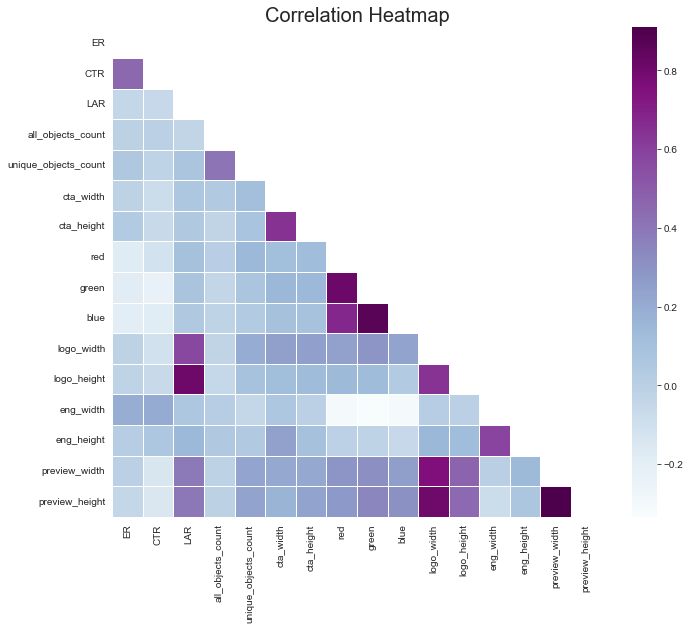

In [68]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

In [69]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(x1, shade=True, color="g")
ax = sns.kdeplot(x2, shade=True, color="b")
plt.title("ER")
plt.ylabel('CTR')

NameError: name 'x1' is not defined

<Figure size 720x432 with 0 Axes>

In [53]:
# remove features
#cleaned_df = df.drop(['cta_text', 'cta_width','cta_height','red', 'green', 'blue'], axis=1)

In [54]:
#cleaned_df.head()

In [63]:
#dremove un reponse users
def remove_users(df):
    clean_data = df.query("not (ER == 0 & CTR == 0)")
    return clean_data
    
clean_data = remove_users(df)

In [44]:
clean_data.groupby(['ER']).count()

CTR  all_text  LAR  all_objects_count  unique_objects_count  \
ER                                                                      
0.000000   25        25   25                 25                    25   
0.001676    1         1    1                  1                     1   
0.001758    1         1    1                  1                     1   
0.002292    1         1    1                  1                     1   
0.002813    1         1    1                  1                     1   
...       ...       ...  ...                ...                   ...   
0.429701    1         0    1                  1                     1   
0.439367    1         1    1                  1                     1   
0.440421    1         1    1                  1                     1   
0.446696    1         1    1                  1                     1   
0.524498    1         1    1                  1                     1   

          cta_text  cta_width  cta_height  red  green  blue  logo_width  \
ER                                                                        
0.000000        25         25          25   25     25    25          25   
0.001676         1          1           1    1      1     1           1   
0.001758         1          1           1    1      1     1           1   
0.002292         1          1           1    1      1     1           1   
0.002813         1          1           1    1      1     1           1   
...            ...        ...         ...  ...    ...   ...         ...   
0.429701         0          0           0    0      0     0           1   
0.439367         1          1           1    1      1     1           1   
0.440421         1          1           1    1      1     1           1   
0.446696         1          1           1    1      1     1           1   
0.524498         0          1           1    1      1     1           1   

          logo_height  eng_width  eng_height  preview_width  preview_height  
ER                                                                           
0.000000           25         25          25             25              25  
0.001676            1          1           1              1               1  
0.001758            1          1           1              1               1  
0.002292            1          1           1              1               1  
0.002813            1          1           1              1               1  
...               ...        ...         ...            ...             ...  
0.429701            1          1           1              1               1  
0.439367            1          1           1              1               1  
0.440421            1          1           1              1               1  
0.446696            1          1           1              1               1  
0.524498            1          1           1              1               1  

[871 rows x 17 columns]

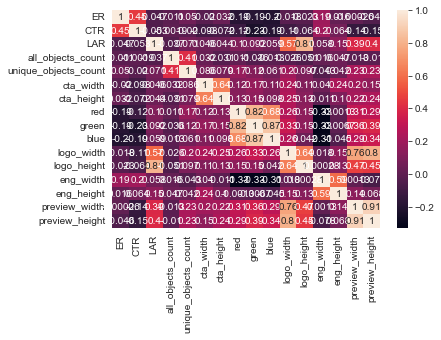

In [45]:
ax = sns.heatmap(df.corr(), annot=True)

In [70]:
clean_data.groupby(['CTR']).count()

ER  all_text  LAR  all_objects_count  unique_objects_count  \
CTR                                                                    
0.000000  46        45   46                 46                    46   
0.000015   1         1    1                  1                     1   
0.000047   1         1    1                  1                     1   
0.000049   1         1    1                  1                     1   
0.000057   1         1    1                  1                     1   
...       ..       ...  ...                ...                   ...   
0.227826   1         1    1                  1                     1   
0.236056   1         1    1                  1                     1   
0.280241   1         1    1                  1                     1   
0.293282   1         1    1                  1                     1   
0.297410   1         1    1                  1                     1   

          cta_text  cta_width  cta_height  red  green  blue  logo_width  \
CTR                                                                       
0.000000         8         46          46   46     46    46          46   
0.000015         0          1           1    1      1     1           1   
0.000047         0          1           1    1      1     1           1   
0.000049         0          1           1    1      1     1           1   
0.000057         0          1           1    1      1     1           1   
...            ...        ...         ...  ...    ...   ...         ...   
0.227826         1          1           1    1      1     1           1   
0.236056         1          1           1    1      1     1           1   
0.280241         1          1           1    1      1     1           1   
0.293282         1          1           1    1      1     1           1   
0.297410         1          1           1    1      1     1           1   

          logo_height  eng_width  eng_height  preview_width  preview_height  
CTR                                                                          
0.000000           46         46          46             46              46  
0.000015            1          1           1              1               1  
0.000047            1          1           1              1               1  
0.000049            1          1           1              1               1  
0.000057            1          1           1              1               1  
...               ...        ...         ...            ...             ...  
0.227826            1          1           1              1               1  
0.236056            1          1           1              1               1  
0.280241            1          1           1              1               1  
0.293282            1          1           1              1               1  
0.297410            1          1           1              1               1  

[851 rows x 17 columns]

In [71]:
clean_data.groupby(['ER']).count()

CTR  all_text  LAR  all_objects_count  unique_objects_count  \
ER                                                                      
0.000000   25        25   25                 25                    25   
0.001676    1         1    1                  1                     1   
0.001758    1         1    1                  1                     1   
0.002292    1         1    1                  1                     1   
0.002813    1         1    1                  1                     1   
...       ...       ...  ...                ...                   ...   
0.429701    1         0    1                  1                     1   
0.439367    1         1    1                  1                     1   
0.440421    1         1    1                  1                     1   
0.446696    1         1    1                  1                     1   
0.524498    1         1    1                  1                     1   

          cta_text  cta_width  cta_height  red  green  blue  logo_width  \
ER                                                                        
0.000000        25         25          25   25     25    25          25   
0.001676         1          1           1    1      1     1           1   
0.001758         1          1           1    1      1     1           1   
0.002292         1          1           1    1      1     1           1   
0.002813         1          1           1    1      1     1           1   
...            ...        ...         ...  ...    ...   ...         ...   
0.429701         0          1           1    1      1     1           1   
0.439367         1          1           1    1      1     1           1   
0.440421         1          1           1    1      1     1           1   
0.446696         1          1           1    1      1     1           1   
0.524498         0          1           1    1      1     1           1   

          logo_height  eng_width  eng_height  preview_width  preview_height  
ER                                                                           
0.000000           25         25          25             25              25  
0.001676            1          1           1              1               1  
0.001758            1          1           1              1               1  
0.002292            1          1           1              1               1  
0.002813            1          1           1              1               1  
...               ...        ...         ...            ...             ...  
0.429701            1          1           1              1               1  
0.439367            1          1           1              1               1  
0.440421            1          1           1              1               1  
0.446696            1          1           1              1               1  
0.524498            1          1           1              1               1  

[871 rows x 17 columns]

# Transform the data

In [84]:
clean_data['all_text'] = clean_data['ER'].map(lambda x: x==1)
clean_df = clean_data.drop(columns = ['red', 'blue','green','cta_text','cta_width','cta_height', 'all_text'], axis=1)
clean_data.head()

ER  CTR  all_text       LAR  all_objects_count  unique_objects_count  \
0   0    0     False  0.000000                  9                     2   
1   0    0     False  0.000000                 13                     2   
2   0    0     False  0.000000                 11                     2   
3   0    0     False  0.078828                  6                     4   
4   0    0     False  0.123817                  8                     1   

     cta_text  cta_width  cta_height    red  green   blue  logo_width  \
0  LEARN MORE       64.0       300.0   23.0   37.0   25.0           0   
1  LEARN MORE       64.0       300.0   23.0   37.0   25.0           0   
2  LEARN MORE       50.0       234.0   23.0   37.0   25.0           0   
3         NaN       79.0       227.0  149.0   78.0   65.0         244   
4          Te       60.0       206.0  128.0  191.0  254.0         323   

   logo_height  eng_width  eng_height  preview_width  preview_height  game_id  
0            0        466          77              0               0    False  
1            0        466          77              0               0    False  
2            0        380          63              0               0    False  
3          174          0           0            859             627    False  
4          115          0           0            500             600    False

In [85]:
#clean_data['all_text']= clean_data['all_text'].astype(int)
#clean_data['cta_text']= clean_data['cta_text'].astype(int)
#clean_data

In [86]:
clean_data['ER']= clean_data['ER'].astype(int)
clean_data

ER  CTR  all_text       LAR  all_objects_count  unique_objects_count  \
0     0    0     False  0.000000                  9                     2   
1     0    0     False  0.000000                 13                     2   
2     0    0     False  0.000000                 11                     2   
3     0    0     False  0.078828                  6                     4   
4     0    0     False  0.123817                  8                     1   
..   ..  ...       ...       ...                ...                   ...   
900   0    0     False  0.000000                  4                     4   
901   0    0     False  0.000000                 12                     3   
902   0    0     False  0.000000                  3                     2   
903   0    0     False  0.000000                 12                     5   
904   0    0     False  0.000000                  0                     0   

                cta_text  cta_width  cta_height    red  green   blue  \
0             LEARN MORE       64.0       300.0   23.0   37.0   25.0   
1             LEARN MORE       64.0       300.0   23.0   37.0   25.0   
2             LEARN MORE       50.0       234.0   23.0   37.0   25.0   
3                    NaN       79.0       227.0  149.0   78.0   65.0   
4                     Te       60.0       206.0  128.0  191.0  254.0   
..                   ...        ...         ...    ...    ...    ...   
900              BUY NOW      111.0       403.0  178.0  165.0   58.0   
901           LEARN MORE       50.0       234.0   23.0   37.0   25.0   
902  Po o LEARN MORE 7 y       53.0       173.0  131.0  159.0  135.0   
903                  NaN       64.0       300.0  119.0  130.0  119.0   
904                  NaN       64.0       300.0  119.0  130.0  119.0   

     logo_width  logo_height  eng_width  eng_height  preview_width  \
0             0            0        466          77              0   
1             0            0        466          77              0   
2             0            0        380          63              0   
3           244          174          0           0            859   
4           323          115          0           0            500   
..          ...          ...        ...         ...            ...   
900           0            0        351         111              0   
901           0            0        380          63              0   
902           0            0        228          28              0   
903           0            0          0           0              0   
904           0            0          0           0              0   

     preview_height  game_id  
0                 0    False  
1                 0    False  
2                 0    False  
3               627    False  
4               600    False  
..              ...      ...  
900               0    False  
901               0    False  
902               0    False  
903               0    False  
904               0    False  

[896 rows x 19 columns]

In [87]:
clean_data['CTR']= clean_data['CTR'].astype(int)
clean_data

ER  CTR  all_text       LAR  all_objects_count  unique_objects_count  \
0     0    0     False  0.000000                  9                     2   
1     0    0     False  0.000000                 13                     2   
2     0    0     False  0.000000                 11                     2   
3     0    0     False  0.078828                  6                     4   
4     0    0     False  0.123817                  8                     1   
..   ..  ...       ...       ...                ...                   ...   
900   0    0     False  0.000000                  4                     4   
901   0    0     False  0.000000                 12                     3   
902   0    0     False  0.000000                  3                     2   
903   0    0     False  0.000000                 12                     5   
904   0    0     False  0.000000                  0                     0   

                cta_text  cta_width  cta_height    red  green   blue  \
0             LEARN MORE       64.0       300.0   23.0   37.0   25.0   
1             LEARN MORE       64.0       300.0   23.0   37.0   25.0   
2             LEARN MORE       50.0       234.0   23.0   37.0   25.0   
3                    NaN       79.0       227.0  149.0   78.0   65.0   
4                     Te       60.0       206.0  128.0  191.0  254.0   
..                   ...        ...         ...    ...    ...    ...   
900              BUY NOW      111.0       403.0  178.0  165.0   58.0   
901           LEARN MORE       50.0       234.0   23.0   37.0   25.0   
902  Po o LEARN MORE 7 y       53.0       173.0  131.0  159.0  135.0   
903                  NaN       64.0       300.0  119.0  130.0  119.0   
904                  NaN       64.0       300.0  119.0  130.0  119.0   

     logo_width  logo_height  eng_width  eng_height  preview_width  \
0             0            0        466          77              0   
1             0            0        466          77              0   
2             0            0        380          63              0   
3           244          174          0           0            859   
4           323          115          0           0            500   
..          ...          ...        ...         ...            ...   
900           0            0        351         111              0   
901           0            0        380          63              0   
902           0            0        228          28              0   
903           0            0          0           0              0   
904           0            0          0           0              0   

     preview_height  game_id  
0                 0    False  
1                 0    False  
2                 0    False  
3               627    False  
4               600    False  
..              ...      ...  
900               0    False  
901               0    False  
902               0    False  
903               0    False  
904               0    False  

[896 rows x 19 columns]

In [88]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Sklearn Pipeline

In [89]:
import pandas as pd
import seaborn as sns
import os, sys
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
#model library
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ER                    905 non-null    float64
 1   CTR                   905 non-null    float64
 2   all_text              899 non-null    object 
 3   LAR                   905 non-null    float64
 4   all_objects_count     905 non-null    int64  
 5   unique_objects_count  905 non-null    int64  
 6   cta_text              727 non-null    object 
 7   cta_width             905 non-null    float64
 8   cta_height            905 non-null    float64
 9   red                   905 non-null    float64
 10  green                 905 non-null    float64
 11  blue                  905 non-null    float64
 12  logo_width            905 non-null    int64  
 13  logo_height           905 non-null    int64  
 14  eng_width             905 non-null    int64  
 15  eng_height            9

In [91]:
def encode_labels(df):
    all_text_encoder = preprocessing.LabelEncoder()
    LAR_encoder = preprocessing.LabelEncoder()
    ER_encoder = preprocessing.LabelEncoder()
    CTR_encoder = preprocessing.LabelEncoder()
    
    all_objects_count_encoder = preprocessing.LabelEncoder()
    unique_objects_count_encoder = preprocessing.LabelEncoder()
    cta_text_encoder = preprocessing.LabelEncoder()
    cta_width_encoder = preprocessing.LabelEncoder()
    cta_height_encoder = preprocessing.LabelEncoder()
    
    red_encoder = preprocessing.LabelEncoder()
    green_encoder = preprocessing.LabelEncoder()
    blue_encoder = preprocessing.LabelEncoder()
    
    logo_width_encoder = preprocessing.LabelEncoder()
    logo_height_encoder = preprocessing.LabelEncoder()
    
    
    eng_height_encoder = preprocessing.LabelEncoder()
    preview_width_encoder = preprocessing.LabelEncoder()
    eng_width_encoder = preprocessing.LabelEncoder()
    preview_height_encoder = preprocessing.LabelEncoder()
    
    
    df['all_text'] =  all_text_encoder.fit_transform(df['all_text'])
    df['LAR'] = LAR_encoder.fit_transform(df['LAR'])
    df['ER'] = ER_encoder.fit_transform(df['ER'])
    df['CTR'] = CTR_encoder.fit_transform(df['CTR'])
    
    df['all_objects_count'] = all_objects_count_encoder.fit_transform(df['all_objects_count'])
    df['unique_objects_count'] = unique_objects_count_encoder.fit_transform(df['unique_objects_count'])
    df['cta_text'] = cta_text_encoder.fit_transform(df['cta_text'])
    df['cta_width'] = cta_width_encoder.fit_transform(df['cta_width'])
    df['cta_height'] = cta_height_encoder.fit_transform(df['cta_height'])
    
    
    df['red'] = red_encoder.fit_transform(df['red'])
    df['green'] = green_encoder.fit_transform(df['green'])
    df['blue'] = blue_encoder.fit_transform(df['blue'])
    
    
    df['logo_width'] = logo_width_encoder.fit_transform(df['logo_width'])    
    df['logo_height'] = logo_height_encoder.fit_transform(df['logo_height'])
    
    df['eng_width'] = eng_width_encoder.fit_transform(df['eng_width'])
    df['eng_height'] = eng_height_encoder.fit_transform(df['eng_height'])
    df['preview_width'] = preview_width_encoder.fit_transform(df['preview_width'])
    df['preview_height'] = preview_height_encoder.fit_transform(df['preview_height'])
    
    
    
    return df


def feature_data(df):
    
    feature_data = df[[ "all_text", "LAR", "ER", 'CTR','all_objects_count','unique_objects_count','cta_text', 'cta_width','cta_height',
                      'red','green','blue','logo_width','logo_height','eng_width','eng_height','preview_width','preview_height']]
    return feature_data  

In [92]:
clean_data = encode_labels(df)
clean_data = feature_data(df)
clean_data.head()

all_text  LAR   ER  CTR  all_objects_count  unique_objects_count  cta_text  \
0       488    0  675  672                  9                     2       126   
1       443    0  800  759                 13                     2       126   
2       477    0  347  568                 11                     2       126   
3        38  108  496  124                  6                     4       299   
4       334  138  399  298                  8                     1       191   

   cta_width  cta_height  red  green  blue  logo_width  logo_height  \
0         50         122    2      2     7           0            0   
1         50         122    2      2     7           0            0   
2         31          69    2      2     7           0            0   
3         66          63   69     11    24          54           96   
4         44          47   50    107   135          82           66   

   eng_width  eng_height  preview_width  preview_height  
0        102          44              0               0  
1        102          44              0               0  
2         69          32              0               0  
3          0           0             32              23  
4          0           0             21              21

Text(0.5, 1.0, 'Pair Plot')

<Figure size 432x288 with 0 Axes>

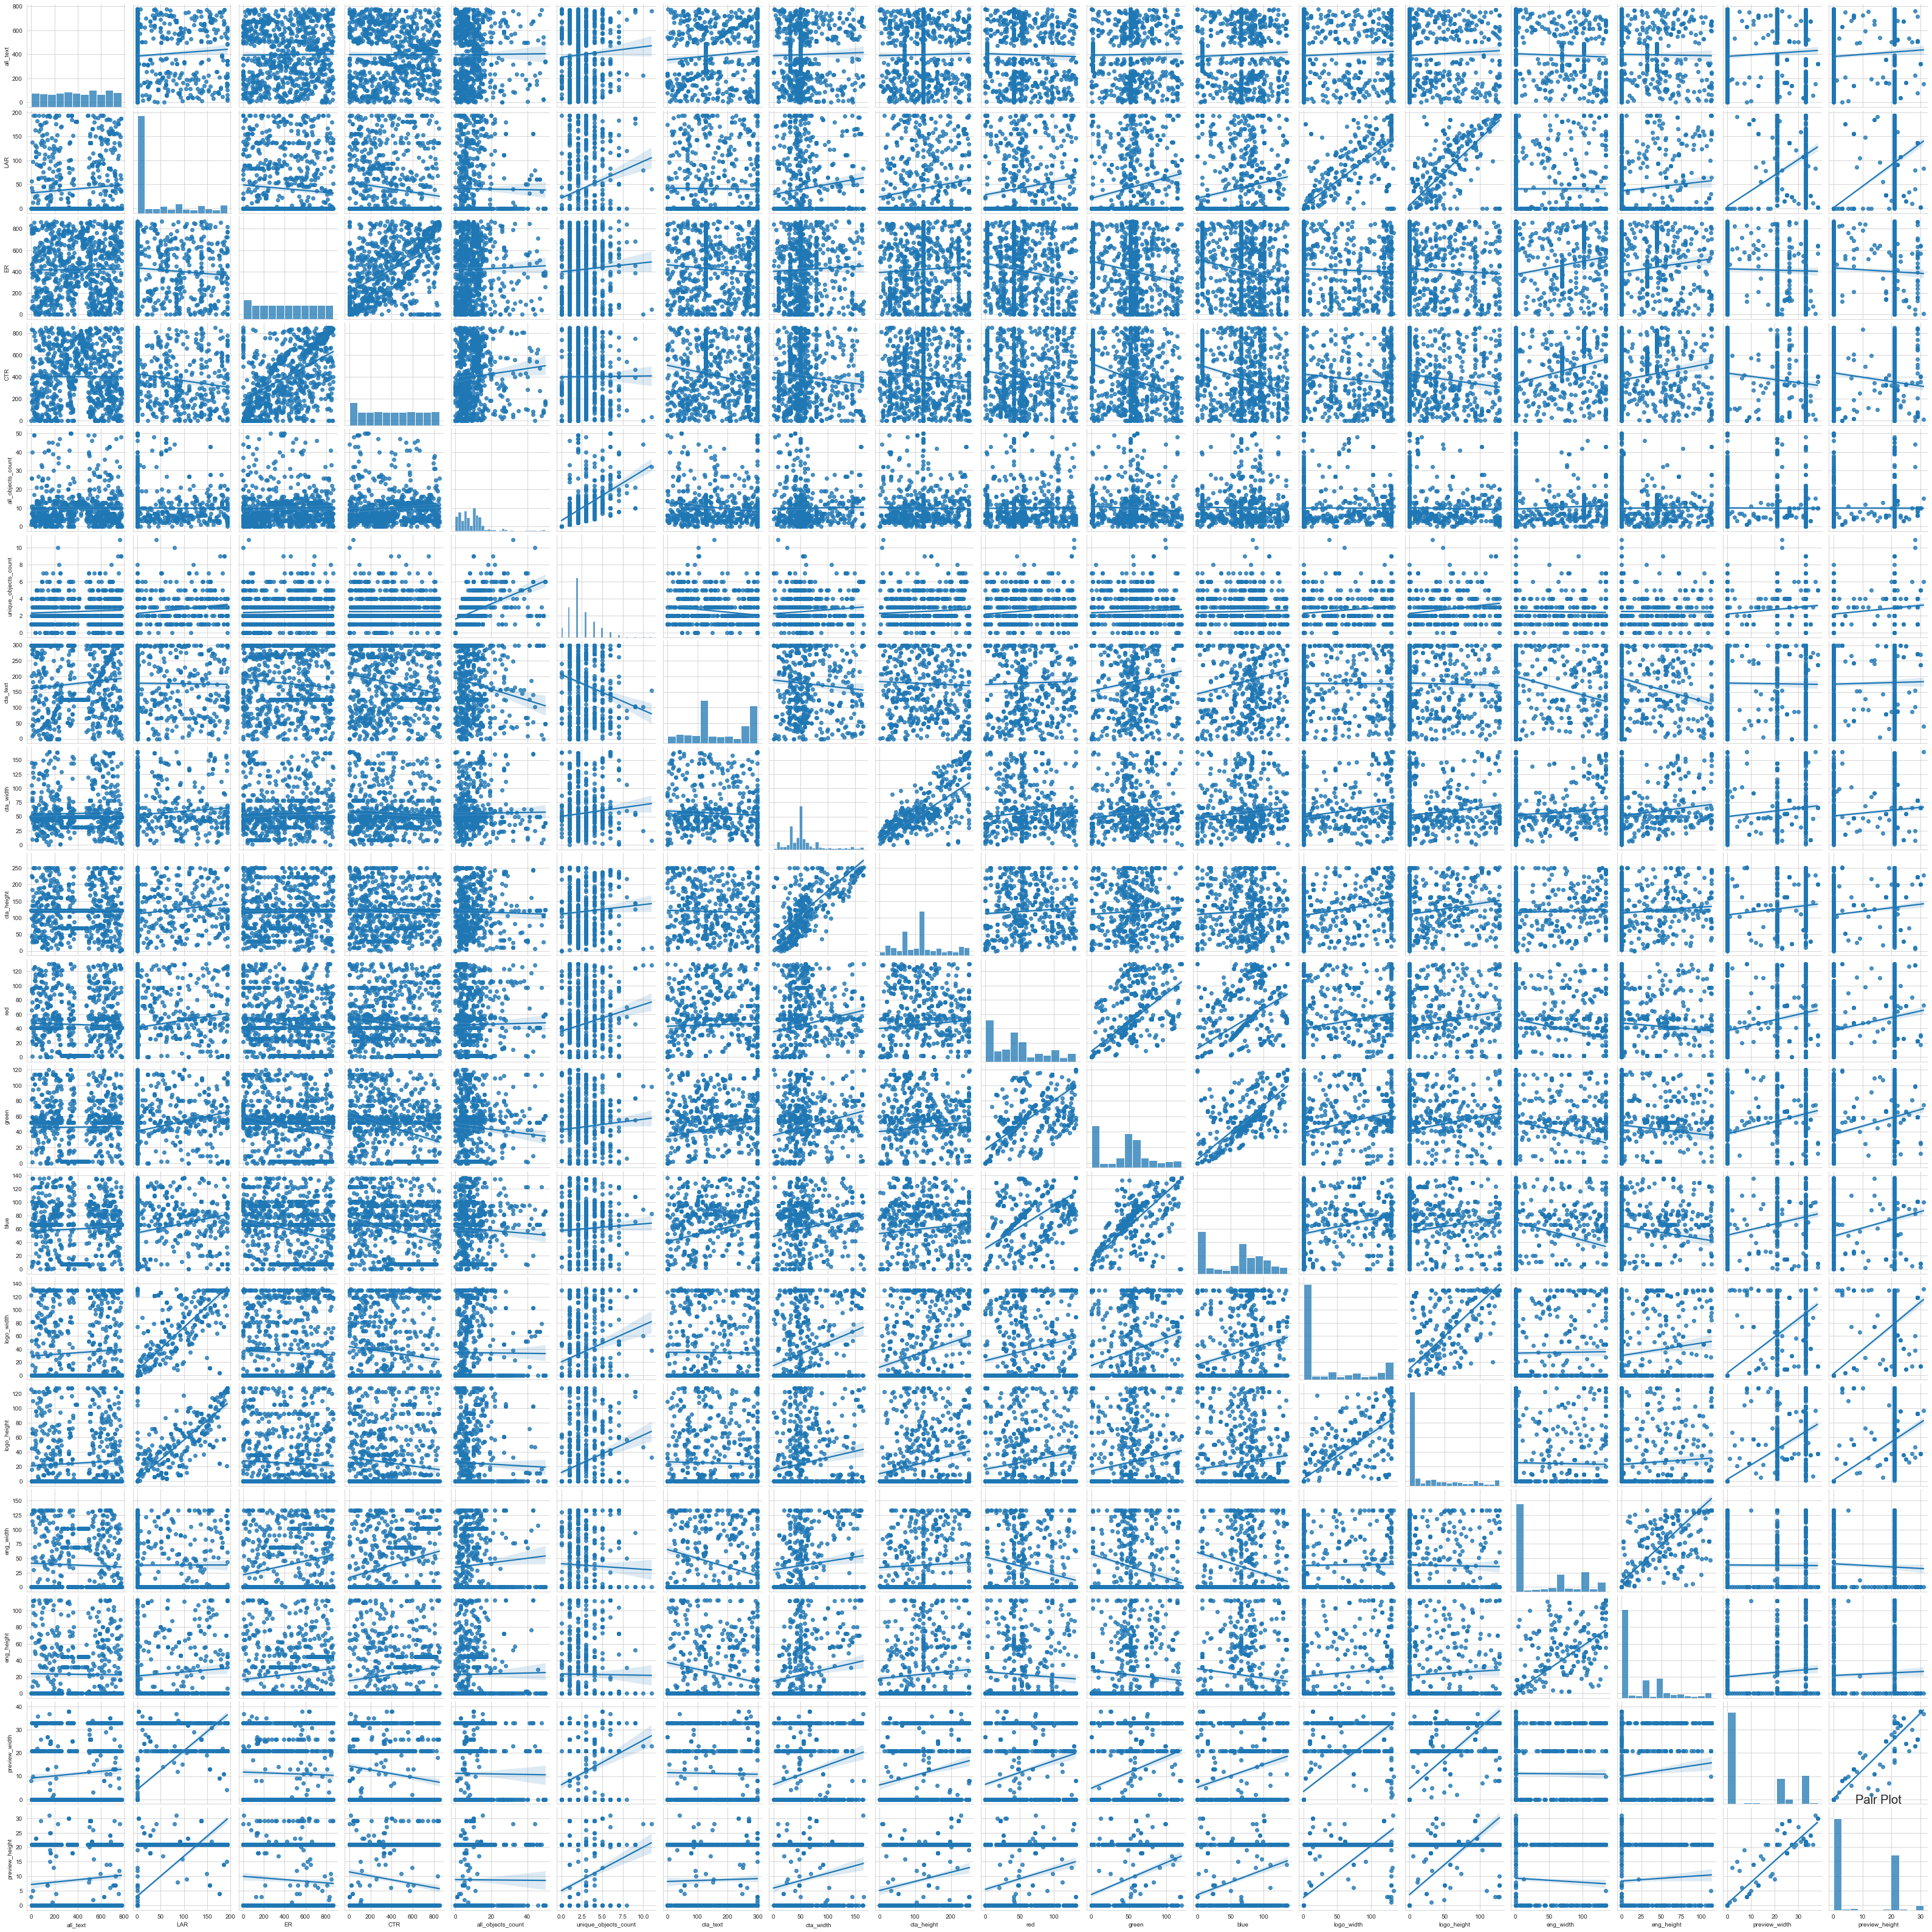

In [94]:
plt.figure()
sns.pairplot(clean_data, kind='reg')
plt.title('Pair Plot', fontsize=20)

In [103]:
X = [
    'all_text', 
    'ER',
    'CTR', 

    'LAR', 
    'all_objects_count',
    'unique_objects_count',
    'cta_text', 
    'cta_width',
    'cta_height',
                      
    'red',
    'green',
    'blue',
    'logo_width',
    'logo_height',
    'eng_width',
    'eng_height',
    'preview_width',
    'preview_height']

#X_train, X_test, y_train, y_test = train_test_split(clean_data[X], ['CTR','ER', test_size=0.1, random_state=10)



In [104]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [105]:
Y_col = 'CTR'
X_cols = clean_data.loc[:, clean_data.columns != Y_col].columns

X_train,X_test,y_train,y_test=train_test_split(clean_data[X_cols], clean_data[Y_col],test_size=0.2, random_state=42)

In [106]:
Y_col = 'ER'
X_cols = clean_data.loc[:, clean_data.columns != Y_col].columns

X_train,X_test,y_train,y_test=train_test_split(clean_data[X_cols], clean_data[Y_col],test_size=0.2, random_state=42)

In [107]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

# hyperparameter tuning

In [108]:
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [109]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.049723756906077346
Decision Tree Test Accuracy: 0.0055248618784530384
RandomForest Test Accuracy: 0.0


In [144]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Logistic Regression


In [ ]:
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] 
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 50, 50],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline, 
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

C:\Users\Genet Shanko\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


# MakePipelines In SKLearn

In [129]:
# Create a pipeline
pipe = make_pipeline((RandomForestClassifier()))
# Create hyperparameters using random forest
grid_param = [
                {"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__n_estimators": [10, 100, 1000],
                 "randomforestclassifier__max_depth":[5,8,15,25,30,None],
                 "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,100],
                 "randomforestclassifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

C:\Users\Genet Shanko\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [130]:
best_model.score(X_test,y_test)

0.049723756906077346

# Random Forest

In [131]:
# Define Random Forest Model
rf = RandomForestClassifier(n_estimators=100)

# We fit our model with our train data
rf.fit(X_train, y_train)

# Then predict results from X_test data
pred_rf = rf.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_rf[0:10])
print("Actual:", y_test[0:10])

Predicted: [845 863 400 251   3 287 648 743 673 114]
Actual: 70     844
457    177
218    107
250    285
39     220
868    692
486    290
110    715
72       0
86     213
Name: ER, dtype: int64


# Desicion Tree

In [133]:
# Define Decision Tree Model
dt = DecisionTreeClassifier()
# We fit our model with our train data
dt.fit(X_train, y_train)
# Then predict results from X_test data
pred_dt = dt.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_dt[0:10])
print("Actual:", y_test[0:10])

Predicted: [845 863 589 251 259  22 738 335 673  48]
Actual: 70     844
457    177
218    107
250    285
39     220
868    692
486    290
110    715
72       0
86     213
Name: ER, dtype: int64


# Logistic Regression

In [134]:
# Define Logistic Regression Model
log = LogisticRegression()
# We fit our model with our train data
log.fit(X_train, y_train)
# Then predict results from X_test data
pred_log = log.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_log[0:10])
print("Actual:", y_test[0:10])

Predicted: [787  94 208   0 156 747 383 778  94 167]
Actual: 70     844
457    177
218    107
250    285
39     220
868    692
486    290
110    715
72       0
86     213
Name: ER, dtype: int64


C:\Users\Genet Shanko\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Bernouilli Naive Bias

In [135]:
from sklearn.naive_bayes import BernoulliNB
# Define Bernouilli Naive Bias Model
bnb = BernoulliNB()
# We fit our model with our train data
bnb.fit(X_train, y_train)
# Then predict results from X_test data
pred_bnb = bnb.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_bnb[0:10])
print("Actual:", y_test[0:10])

Predicted: [0 0 0 0 0 0 0 0 0 0]
Actual: 70     844
457    177
218    107
250    285
39     220
868    692
486    290
110    715
72       0
86     213
Name: ER, dtype: int64


# Gaussian Naive Bias

In [136]:
from sklearn.naive_bayes import GaussianNB
# Define Gaussian Naive Bias Model
gnb = GaussianNB()
# We fit our model with our train data
gnb.fit(X_train, y_train)
# Then predict results from X_test data
pred_gnb = gnb.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_gnb[0:10])
print("Actual:", y_test[0:10])

Predicted: [0 0 0 0 0 0 0 0 0 0]
Actual: 70     844
457    177
218    107
250    285
39     220
868    692
486    290
110    715
72       0
86     213
Name: ER, dtype: int64


# KNN - K-Nearest Neighbours

In [137]:
from sklearn.neighbors import KNeighborsClassifier
# Define KNN Model
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
# We fit our model with our train data
knn.fit(X_train, y_train)
# Then predict results from X_test data
pred_knn = knn.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_knn[0:10])
print("Actual:", y_test[0:10])

Predicted: [787 101 208   0  57 699   0 743   0  57]
Actual: 70     844
457    177
218    107
250    285
39     220
868    692
486    290
110    715
72       0
86     213
Name: ER, dtype: int64


# XGBoost

# Compare the models performances

In [ ]:


# Confusion Matrixes
# First parameter is actual value
# second parameter is value that we prediceted
from sklearn.metrics import accuracy_score, confusion_matrix
# Random Forest 
cm_rf = confusion_matrix(y_test, pred_rf)
# Desicion Tree
cm_dt = confusion_matrix(y_test, pred_dt)
# Logistic Regression
cm_log = confusion_matrix(y_test, pred_log)
# Bernouilli Naive Bias
cm_bnb = confusion_matrix(y_test, pred_bnb)
# Gaussian Naive Bias
cm_gnb = confusion_matrix(y_test, pred_gnb)
# KNN (K-Nearest Neighbors)
cm_knn = confusion_matrix(y_test, pred_knn)
# XGBoost 
#cm_xgb = confusion_matrix(y_test, pred_xgb)

print("***********************")
print("Confusion Matrixes")
print("***********************")
print("Random Forest:\n", cm_rf)
print("Desicion Tree:\n", cm_dt)
print("Logistic Regression:\n", cm_log)
print("Bernouilli Naive Bias:\n", cm_bnb)
print("Gaussian Naive Bias:\n", cm_gnb)
print("KNN (K-Nearest Neighbors):\n", cm_knn)
#print("XGBoost:\n", cm_xgb)


# Accuracy scores

In [ ]:
# Accuracy Scores
# First parameter is actual value
# second parameter is value that we prediceted

# Random Forest 
acc_rf = accuracy_score(y_test, pred_rf)
# Desicion Tree
acc_dt = accuracy_score(y_test, pred_dt)
# Logistic Regression
acc_log = accuracy_score(y_test, pred_log)
# Bernouilli Naive Bias
acc_bnb = accuracy_score(y_test, pred_bnb)
# Gaussian Naive Bias
acc_gnb = accuracy_score(y_test, pred_gnb)
# KNN (K-Nearest Neighbors)
acc_knn = accuracy_score(y_test, pred_knn)
# XGBoost 
#acc_xgb = accuracy_score(y_test, pred_xgb)

print("***********************")
print("Accuracy Scores")
print("***********************")
print("Random Forest:", acc_rf)
print("Desicion Tree:", acc_dt)
print("Logistic Regression:", acc_log)
print("Bernouilli Naive Bias:", acc_bnb)
print("Gaussian Naive Bias:", acc_gnb)
print("KNN (K-Nearest Neighbors):", acc_knn)
#print("XGBoost:", acc_xgb)